### Question 1

#### Create a Binomial distribution graph that includes the following repetitions and values of p **(2.5 points)**  

    Repetitions (events) = 8, 20, 25, 40, 50
    p = 0.15, 0.25, 0.53, 0.74, 0.99

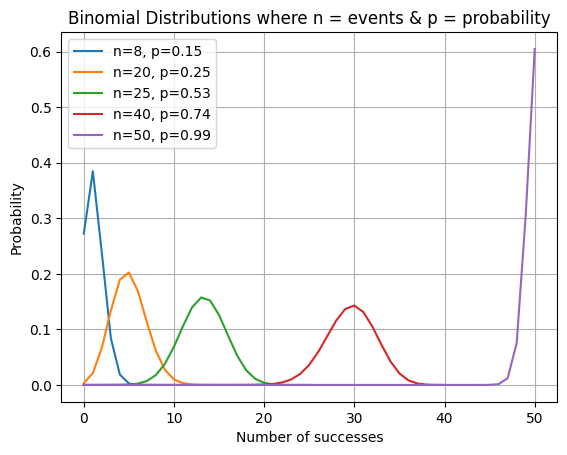

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

repetitions = [8, 20, 25, 40, 50]  # List of different numbers of trials
probabilities = [0.15, 0.25, 0.53, 0.74, 0.99]  # List of different probabilities of success

for n, p in zip(repetitions, probabilities):  # Loop through each pair of trials and probabilities
    x = np.arange(0, n + 1)  # Generate an array of possible outcomes (0 to n)
    pmf = stats.binom.pmf(x, n, p)  # Calculate the probability mass function for each outcome
    plt.plot(x, pmf, label=f'n={n}, p={p}')  # Plot the PMF as a line graph with markers

plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Binomial Distributions where n = events & p = probability')
plt.legend()
plt.grid(True)
plt.show()


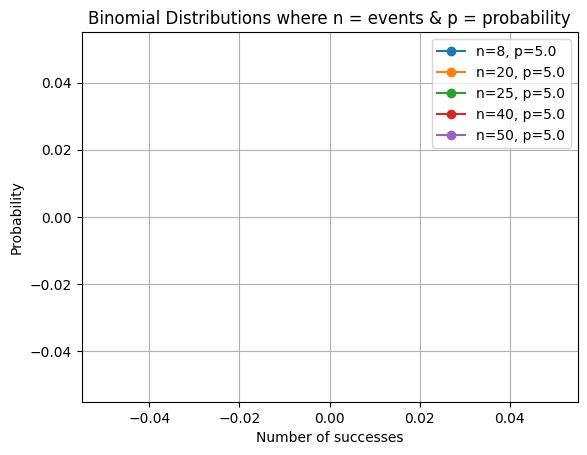

In [15]:
repititions = []
probabilities = []

amount = int(input("Enter the number of times you want to run: "))

for i in range(amount):
    rep = int(input(f"Enter trial number {i + 1}: "))
    prob = float(input(f"Enter probability number {i + 1}: "))
    repititions.append(rep)
    probabilities.append(prob)

for n, p in zip(repetitions, probabilities):  # Loop through each pair of trials and probabilities
    x = np.arange(0, n+1)  # Generate an array of possible outcomes (0 to n)
    pmf = stats.binom.pmf(x, n, p)  # Calculate the probability mass function for each outcome
    plt.plot(x, pmf, marker='o', label=f'n={n}, p={p}')  # Plot the PMF as a line graph with markers

plt.xlabel('Number of successes')
plt.ylabel('Probability') 
plt.title('Binomial Distributions where n = events & p = probability')  
plt.legend()  
plt.grid(True) 
plt.show() 

#### Find a pattern and explain your findings.  

- Higher P values skew the PMF more towards a higher number of successes while a lower P value decreases the number of successes
- Larger n values show a more spread PMF while the lower the n value the more condensed it is  
  
So higher probabilities make the graph more skewed towards more successes while the more trials or n value the more the graph is smoothed out.

### Question 2

#### Create a Poison distribution graph that includes the following number of events and values of lambda **(2.5 points)**  

    lambda = 0.5, 1, 1.5, 2, 20
    events = 10, 30, 30, 60, 60

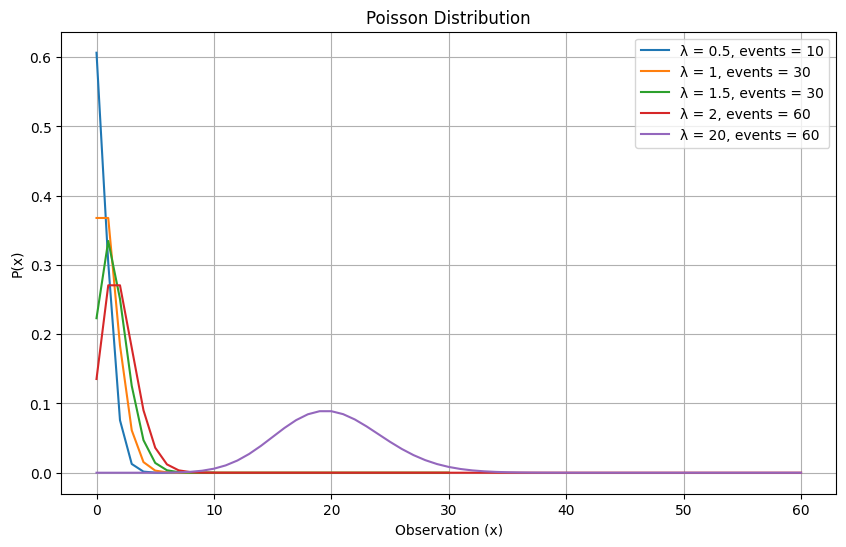

In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def factorial(n):
    fact = 1  # Initializing the factorial result to 1
    for i in range(1, n + 1):
        fact *= i  # Multiplying each number from 1 to n
    return fact  # Returning the factorial of n

def poisson_distribution(lambda_, n_events):
    results = []  # Initializing an empty list to store results
    for x in range(0, n_events + 1):
        num_ = (math.exp(-lambda_)) * (lambda_**x)  # Calculating numerator of Poisson formula
        denominator = factorial(x)  # Calculating denominator (factorial of x)
        P_x = num_/denominator  # Calculating the probability P(x)
        results.append([x, P_x])  # Appending the number of events and the probability
    return pd.DataFrame(results, columns=['x', 'P(x)'])  # Creating a DataFrame from the results

lambdas = [0.5, 1, 1.5, 2, 20]  # List of lambda values
events = [10, 30, 30, 60, 60]  # List of corresponding event counts

plt.figure(figsize = (10, 6))  # Creating a figure with a specific size
for lambda_, event in zip(lambdas, events):
    df = poisson_distribution(lambda_, event)  # Getting Poisson distribution DataFrame
    plt.plot(df['x'], df['P(x)'], label=f'λ = {lambda_}, events = {event}')  # Plotting the distribution

plt.xlabel('Observation (x)') 
plt.ylabel('P(x)') 
plt.title('Poisson Distribution') 
plt.legend() 
plt.grid(True) 
plt.show()  

#### Obtain the following cumulative probabilities:  
`x <= 8, lambda = 15`  
`x <= 8, lambda = 10`  
`x <= 6, lambda = 5`  

In [7]:
import math

def poisson_cumulative(lambda_, x_max):
    cumulative_prob = 0  # Set cumulative probability to 0
    for x in range(x_max + 1):
        # Calculating the Poisson probability for x
        num_ = (math.exp(-lambda_)) * (lambda_**x)
        denominator = math.factorial(x)
        P_x = num_ / denominator
        cumulative_prob += P_x  # Adding the probability to the cumulative probability
    return cumulative_prob  # Returning the cumulative probability

# A list of tuples with x_max (maximum value for x) and lambda_ (lambda value)
values = [(8, 15), (8, 10), (6, 5)]

# Calculating cumulative probabilities for each pair of x_max and lambda_
results = []
for x_max, lambda_ in values:
    prob = poisson_cumulative(lambda_, x_max)
    results.append((x_max, lambda_, prob))

# Displaying results
for x_max, lambda_, prob in results:
    print(f'P(X <= {x_max}) for lambda = {lambda_} is approximately {prob}')


P(X <= 8) for lambda = 15 is approximately 0.03744649347967288
P(X <= 8) for lambda = 10 is approximately 0.33281967875071894
P(X <= 6) for lambda = 5 is approximately 0.7621834629729387


Find the pattern and add some comments on the results

The first two scenarios with a higher lambda result in a lower probability due to the fact that we are expecting to see a larger number of events than we are testing for. Where as the case with the lower lambda and similar Px, the probability will be higher.  
`λ = 15 means it's less likely to see up to 8 events because you expect a lot more.`  
`λ = 10 means seeing up to 8 events is more probable than when λ is 15.`  
`λ = 5 means seeing up to 6 events is quite likely because the average is low.`

### Question 3

#### From the GDP file, obtain the following values: count, mean, std, min, 25% (Q1), 50% (Q2), 75% (Q3), min and max values of the countries in 2019 and 2020 **(1 point)**

In [19]:
import pandas as pd

#df = pd.read_csv('GDP.csv', usecols = ['country_name', 'country_code', 'year_2018', 'year_2019', 'year_2020', 'year_2021'])
df = pd.read_csv('GDP.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

cols = ['2018', '2019', '2020', '2021']
for col in cols:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

print(df.describe())

print(df['2019'].min())
print(df['2019'].max())

print(df['2020'].min())
print(df['2020'].max())

               2018          2019          2020          2021
count  2.100000e+02  2.080000e+02  2.040000e+02  1.820000e+02
mean   4.070309e+11  4.167491e+11  4.109396e+11  5.147954e+11
std    1.797413e+12  1.865060e+12  1.864234e+12  2.229263e+12
min    4.781829e+07  5.422315e+07  5.505471e+07  6.310096e+07
25%    6.274464e+09  6.464318e+09  6.865301e+09  1.116964e+10
50%    2.577176e+10  2.632751e+10  2.513910e+10  3.757875e+10
75%    1.823362e+11  1.875364e+11  1.854861e+11  2.499653e+11
max    2.052716e+13  2.137257e+13  2.089374e+13  2.299610e+13
54223149.0
21372572437000.0
55054711.0
20893743833000.0
26327508887.5


Write some insights on what you saw, any interesting finding or
pattern?

- When looking at the min and max in 2019 and 2020, there is quite a large gap between the highest and lowest GDP and therefore it shows that some countries are significantly richer than others. 
- The median is around 25 billion which is the middle value. Therefore we can guage that half of the countries fall under this number while the other half are greater
- You can also see by looking at the mean that the average GDP is growing year over year and therefore the economies are growing.
- Finally the standard deviation is quite large which also shows that there is a large difference between the richest and poorest countries.

### Question 4

#### From the Bayes' Theorem example, calculate the following cases **(3 points)**:  
An analyst wants to know if the a company stocks are going to go up
depending on their results.

The probability of a good report from S&P and Moody’s is 20% given that the
EBITDA (X) was higher than 10% compared to the previous year.
The probability of a good report from S&P is 90% and 20% from Moody’s
given that the revenues (Y) were higher than 15% compared to the previous
year.  

The probability of a good report from S&P is 20% and 90% from Moody’s
given that the inventory (Z) was higher than 20% compared to the previous
year.

`The probability of X is 0.7, the probability of Y is 0.15 and Z is also 0.15.`

##### Probability of X, Y and Z given a good report from S&P

In [2]:
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

P_A_given_X = 0.2
P_A_given_Y = 0.9
P_A_given_Z = 0.2

P_A = (P_A_given_X * P_X) + (P_A_given_Y * P_Y) + (P_A_given_Z * P_Z)

P_X_given_A = (P_X * P_A_given_X) / P_A
P_Y_given_A = (P_Y * P_A_given_Y) / P_A
P_Z_given_A = (P_Z * P_A_given_Z) / P_A

print(f"The probability of X is {P_X_given_A} Y is {P_Y_given_A} and Z  is {P_Z_given_A}")

The probability of X is 0.45901639344262285 Y is 0.44262295081967207 and Z  is 0.0983606557377049


##### Probability of X, Y and Z given a good report from Moody’s and after a good report from S&P

In [3]:
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

P_A_and_B = (P_X_given_A * P_B_given_X) + (P_Y_given_A * P_B_given_Y) + (P_Z_given_A * P_B_given_Z)

P_A_and_B_given_X = (P_X_given_A * P_B_given_X) / P_A_and_B
P_A_and_B_given_Y = (P_Y_given_A * P_B_given_Y) / P_A_and_B
P_A_and_B_given_Z = (P_Z_given_A * P_B_given_Z) / P_A_and_B 

print(f"The probability of X is {P_A_and_B_given_X} Y is {P_A_and_B_given_Y} and Z is {P_A_and_B_given_Z}")

The probability of X is 0.3414634146341463 Y is 0.32926829268292684 and Z is 0.3292682926829268


##### Probability of X, Y and Z given that Moody’s did not emit a good report and after a good report from S&P

In [5]:
P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

P_not_B_given_X = 1 - P_B_given_X
P_not_B_given_Y = 1 - P_B_given_Y
P_not_B_given_Z = 1 - P_B_given_Z

P_A_and_not_B = (P_X_given_A * P_not_B_given_X) + (P_Y_given_A * P_not_B_given_Y) + (P_Z_given_A * P_not_B_given_Z)

P_A_not_B_given_X = (P_X_given_A * P_not_B_given_X) / P_A_and_not_B
P_A_not_B_given_Y = (P_Y_given_A * P_not_B_given_Y) / P_A_and_not_B
P_A_not_B_given_Z = (P_Z_given_A * P_not_B_given_Z) / P_A_and_not_B

print(f"The probability of X is {P_A_not_B_given_X} Y is {P_A_not_B_given_Y} and Z is {P_A_not_B_given_Z}")

The probability of X is 0.5022421524663677 Y is 0.4843049327354261 and Z is 0.013452914798206273


##### Probability of X, Y and Z given that S&P did not emit a good report

In [6]:
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

P_A_given_X = 0.2
P_A_given_Y = 0.9
P_A_given_Z = 0.2

P_X_not_A = 1 - P_A_given_X
P_Y_not_A = 1 - P_A_given_Y
P_Z_not_A = 1 - P_A_given_Z

P_not_A = (P_X_not_A * P_X) + (P_Y_not_A * P_Y) + (P_Z_not_A * P_Z)

P_not_A_given_X = (P_X_not_A * P_X) / P_not_A
P_not_A_given_Y = (P_Y_not_A * P_Y) / P_not_A
P_not_A_given_Z = (P_Z_not_A * P_Z) / P_not_A

print(f"The probability of X is {P_not_A_given_X} Y is {P_not_A_given_Y} and Z is {P_not_A_given_Z}")

The probability of X is 0.8057553956834532 Y is 0.021582733812949634 and Z is 0.17266187050359713


##### Probability of X, Y and Z given that Moody’s emitted a good report and after confirming that S&P did not

In [7]:
P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

P_not_A_and_B = (P_B_given_X * P_not_A_given_X) + (P_B_given_Y * P_not_A_given_Y) + (P_B_given_Z * P_not_A_given_Z)

P_not_A_and_B_given_X = (P_B_given_X * P_not_A_given_X) / P_not_A_and_B
P_not_A_and_B_given_Y = (P_B_given_Y * P_not_A_given_Y) / P_not_A_and_B
P_not_A_and_B_given_Z = (P_B_given_Z * P_not_A_given_Z) / P_not_A_and_B

print(f"The probability of X is {P_not_A_and_B_given_X} Y is {P_not_A_and_B_given_Y} and Z is {P_not_A_and_B_given_Z}")

The probability of X is 0.5022421524663676 Y is 0.013452914798206272 and Z is 0.48430493273542596


##### Probability of X, Y and Z given that Moody's did not emit a good report after S&P did not emit a good report either

In [8]:
P_X = 0.7
P_Y = 0.15
P_Z = 0.15

P_B_given_X = 0.2
P_B_given_Y = 0.2
P_B_given_Z = 0.9

P_not_B_given_X = 1 - P_B_given_X
P_not_B_given_Y = 1 - P_B_given_Y
P_not_B_given_Z = 1 - P_B_given_Z

P_not_A_and_not_B = (P_not_A_given_X * P_not_B_given_X) + (P_not_A_given_Y * P_not_B_given_Y) + (P_not_A_given_Z * P_not_B_given_Z)

P_not_A_and_not_B_given_X = (P_not_A_given_X * P_not_B_given_X) / P_not_A_and_not_B
P_not_A_and_not_B_given_Y = (P_not_A_given_Y * P_not_B_given_Y) / P_not_A_and_not_B
P_not_A_and_not_B_given_Z = (P_not_A_given_Z * P_not_B_given_Z) / P_not_A_and_not_B

print(f"The probability of X is {P_not_A_and_not_B_given_X} Y is {P_not_A_and_not_B_given_Y} and Z is {P_not_A_and_not_B_given_Z}")

The probability of X is 0.9491525423728813 Y is 0.02542372881355931 and Z is 0.02542372881355931


### Question 5

#### Assume that the population follows a normal distribution in terms of annual income of with an average of 37000 EUR and a standard deviation of 5000 EUR. Create a graph and locate the following percentiles **(1 point)**:

`Above 50%`  
`Above 75%`  
`Above 90%`  
`Top 5%`  
`Top 1%`  

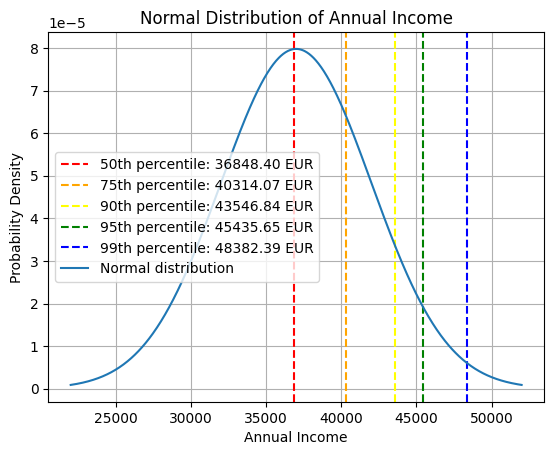

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define mean and standard deviation for the normal distribution
mean = 37000
std_dev = 5000

# List of percentiles and their corresponding colors
percentiles = [50, 75, 90, 95, 99]
colors = ['red', 'orange', 'yellow', 'green', 'blue']
percentile_values = []

# Loop through each percentile and color
for percentile, color in zip(percentiles, colors):
    value = np.percentile(np.random.normal(mean, std_dev, 10000), percentile) # Generate 10,000 samples from the normal distribution
    percentile_values.append(value) # Append the calculated percentile value to the list
    plt.axvline(x=value, linestyle='--', color=color, label=f'{percentile}th percentile: {value:.2f} EUR') # Plot a vertical line for the percentile value

# Plotting the normal distribution
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev) # Calculate the probability density function for the normal distribution
plt.plot(x, y, label='Normal distribution')

plt.xlabel('Annual Income')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Annual Income')
plt.legend()
plt.grid()
plt.show()
